In [77]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [78]:
# Reading in the Nobel Prize data
nobel = pd.read_csv('Nobel_prize.csv')

In [81]:
# Taking a look at the first several winners
nobel.head()

#nobel['Birth Date'] = pd.to_datetime(nobel['Birth Date'])


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1-Jan,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,3/1/1911,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1-Jan,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,9/7/1907,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1-Jan,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,3/31/1917,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,10/30/1910,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,2-Jan,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,6/12/1912,Paris,France


In [82]:
# Display the number of Nobel Prizes handed out between 1901 and 2016

print(len(nobel))

969


In [83]:
# Display the number of prizes won by male and female recipients.
print(nobel['Sex'].value_counts())

Male      893
Female     50
Name: Sex, dtype: int64


In [84]:
# Display the number of prizes won by the top 10 nationalities.
nobel['Birth Country'].value_counts().head(10)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Italy                        18
Canada                       18
Name: Birth Country, dtype: int64

In [85]:
# Calculating the proportion of USA born winners per decade
nobel['Usa Born Winners'] = nobel['Birth Country'] == 'United States of America'
nobel['Decade'] = (np.floor(nobel['Year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('Decade', as_index=False)['Usa Born Winners'].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners

,Decade,Usa Born Winners
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


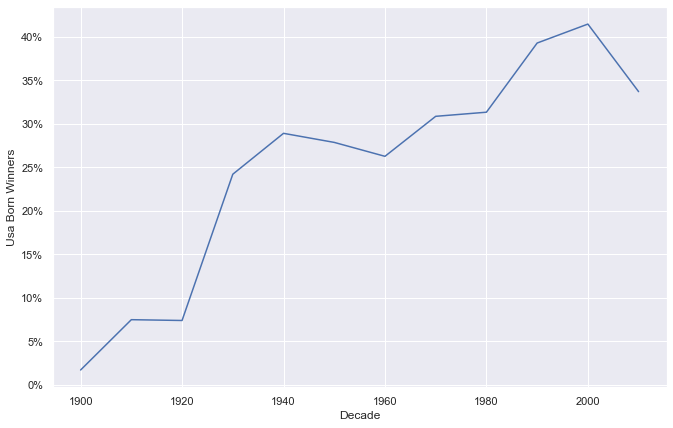

In [86]:
# Setting the plotting theme
sns.set()

# setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='Decade', y='Usa Born Winners', data=prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1,0))

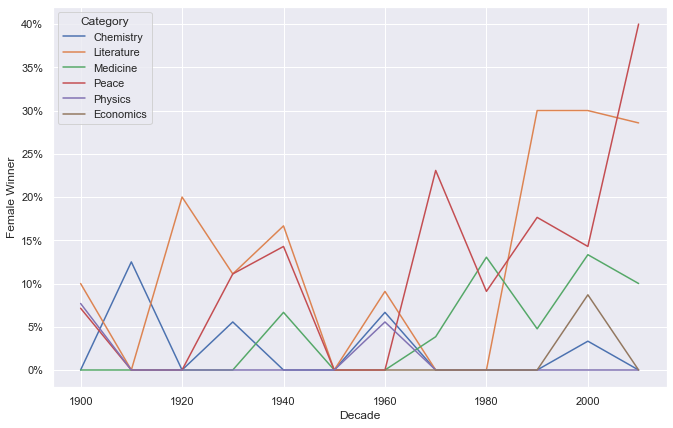

In [87]:
# Calculating the proportion of female laureates per decade
nobel['Female Winner'] = nobel['Sex'] == 'Female'
prop_female_winners = nobel.groupby(['Decade', 'Category'], as_index=False)['Female Winner'].mean()

# Plotting USA born winners with % winners on the y-axis
plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(x = 'Decade', y = 'Female Winner', data = prop_female_winners, hue = 'Category')

ax.yaxis.set_major_formatter(PercentFormatter(1,0))

In [88]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel.Sex == 'Female'].nsmallest(1, 'Year')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Usa Born Winners,Decade,Female Winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",4-Jan,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,7/4/1934,Sallanches,France,False,1900,True


In [89]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('Full Name').filter(lambda group : len(group) >= 2 )

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Usa Born Winners,Decade,Female Winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",4-Jan,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,7/4/1934,Sallanches,France,False,1900,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",2-Jan,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Goettingen University,Göttingen,Germany,8/20/1915,Bad Homburg vor der Höhe,Germany,False,1900,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",2-Jan,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,8/20/1915,Bad Homburg vor der Höhe,Germany,False,1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1-Jan,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,7/4/1934,Sallanches,France,False,1910,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1-Jan,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",3-Jan,906,Individual,Isamu Akasaki,1929-01-30,Chiran,...,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN,False,2010,False
945,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",3-Jan,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Francis Crick Institute,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",3-Jan,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,...,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
947,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",3-Jan,922,Individual,Paul Modrich,1946-06-13,"Raton, NM",...,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN,True,2010,False


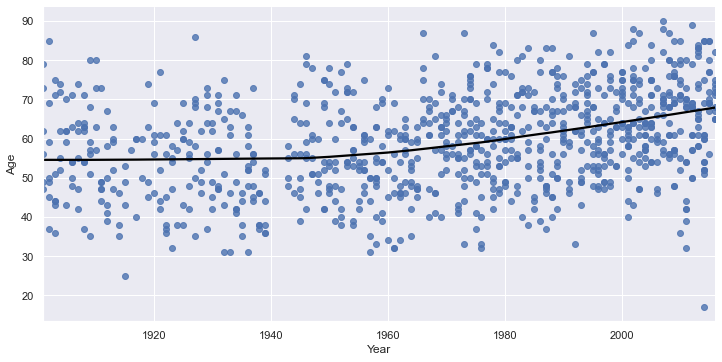

In [92]:
# Converting birth_date from String to datetime
nobel['Birth Date'] = pd.to_datetime(nobel['Birth Date'])

# Calculating the age of Nobel Prize winners
nobel['Age'] = nobel['Year'] - nobel['Birth Date'].dt.year

#Plotting the age of Nobel Prize winners
sns.lmplot(x = 'Year', y = 'Age', data = nobel, lowess = True, aspect = 2, line_kws={'color' : 'black'})

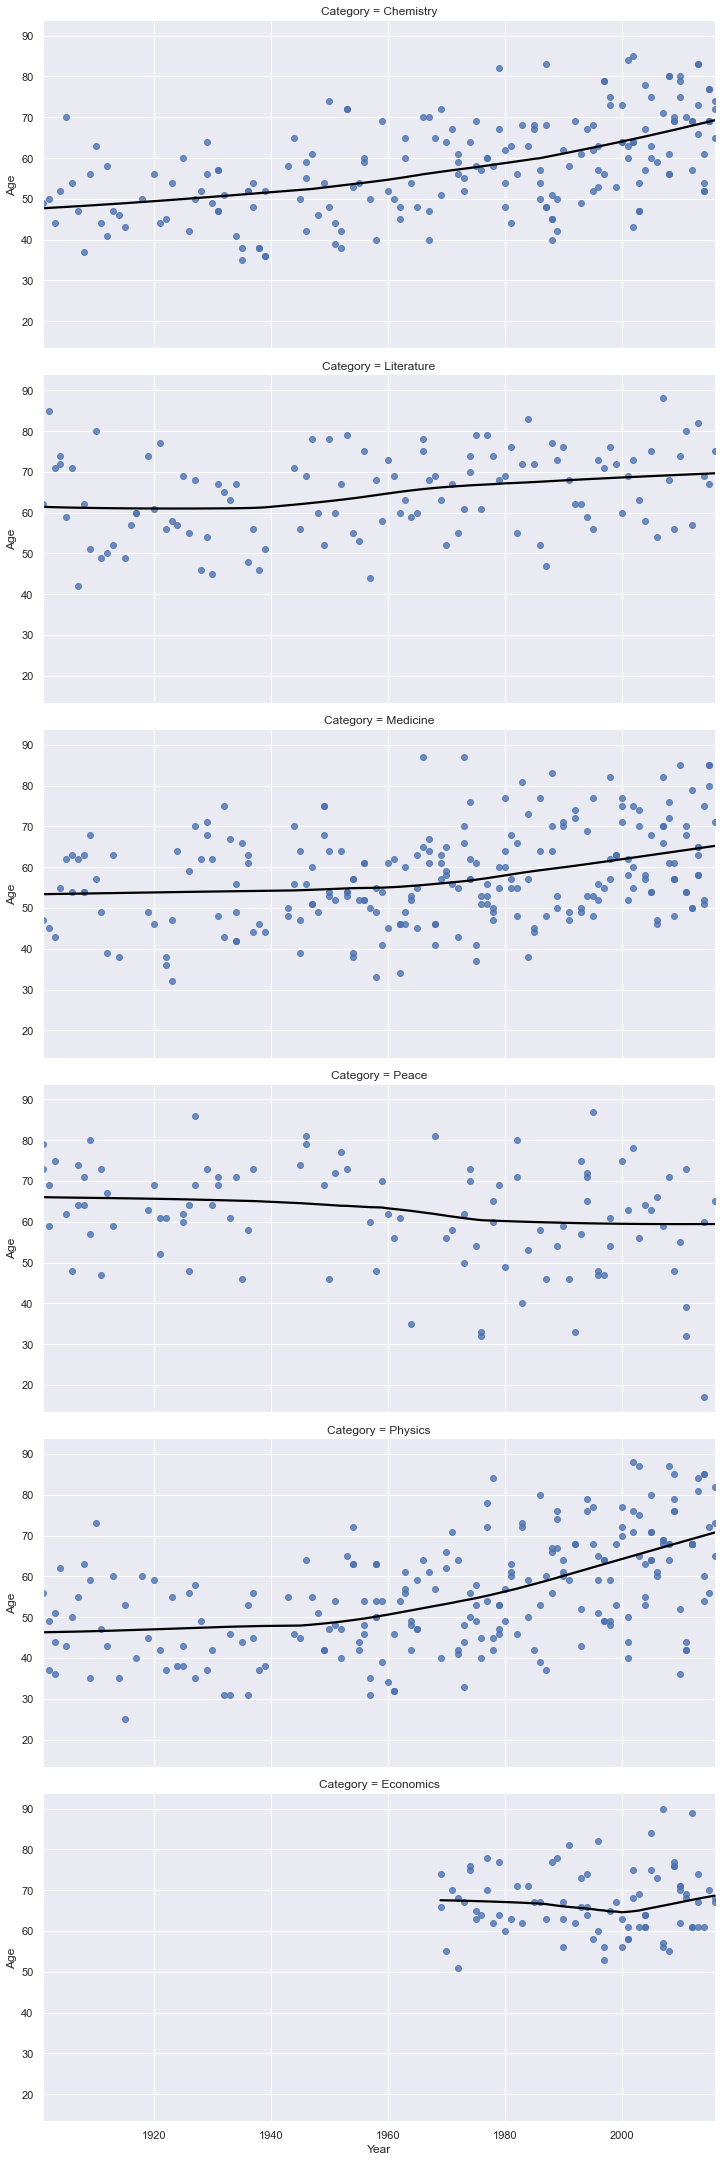

In [93]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x = 'Year', y = 'Age', data = nobel, row = 'Category', lowess = True, aspect = 2, line_kws={'color' : 'black'})

In [103]:
# The oldest winner of a Nobel Prize as of 2016
oldest_winner = nobel.nlargest(1, 'Age')
display(oldest_winner)

# The youngest winner of a Nobel Prize as of 2016
youngest_winner = nobel.nsmallest(1, 'Age')
display(youngest_winner)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Usa Born Winners,Decade,Female Winner,Age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",3-Jan,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,6/24/2008,"Minneapolis, MN",United States of America,False,2000,False,90.0


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Usa Born Winners,Decade,Female Winner,Age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",2-Jan,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
